In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Se importa el modelo,lineal para la regresión lineal
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from scipy.spatial import distance
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles, make_moons, make_classification


In [10]:
dataframe = pd.read_csv(r"lego_data.csv",sep=',',header=None)
#dataframe = shuffle(dataframe, random_state=0)
print(dataframe.shape)
dataframe.head(5)

(121, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,726.0,4440.0,6754.0,2034.0,7480.0,6133.0,13.0,0.0,495.0,419.0,...,0.0,64.0,145.0,166.0,2.0,123.0,571.0,4823.0,1353.0,1.0
1,677.0,2983.0,4738.0,1082.0,2195.0,5083.0,35.0,0.0,83.0,89.0,...,0.0,53.0,136.0,136.0,0.0,185.0,319.0,3776.0,1392.0,1.0
2,237.0,1524.0,8821.0,1123.0,840.0,448.0,31.0,0.0,1100.0,53.0,...,0.0,42.0,173.0,40.0,0.0,73.0,562.0,3152.0,681.0,1.0
3,100.0,1557.0,6266.0,3640.0,397.0,540.0,55.0,0.0,2283.0,102.0,...,0.0,20.0,188.0,50.0,0.0,53.0,477.0,849.0,73.0,1.0
4,728.0,1744.0,2940.0,276.0,1178.0,93.0,0.0,0.0,1139.0,0.0,...,0.0,18.0,164.0,87.0,0.0,52.0,352.0,5318.0,2726.0,1.0


In [19]:
Xtotal = dataframe[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63]].values
ytotal = dataframe[64].values
#scaler = StandardScaler()
#scaler.fit(Xtotal)
#Xtotal = scaler.transform(Xtotal)
#pca = decomposition.PCA(n_components=55,whiten=True)
#pca.fit(Xtotal)
#Xtotal = pca.transform(Xtotal)
X_train, X_test, y_train, y_test = train_test_split(Xtotal, ytotal, test_size = 0.3, train_size = 0.7, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#print("Pesos de PCA:",pca.explained_variance_ratio_)

In [20]:
n_neighbors = 2
#import sklearn
#sorted(sklearn.neighbors.VALID_METRICS['brute'])
distance='euclidean'
knn = KNeighborsClassifier(n_neighbors,weights='distance',metric=distance,metric_params=None,algorithm='auto')
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.95


In [21]:
y_test_predicted = knn.predict(X_test)
y_test_scores = knn.predict_proba(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)

matthews_corrcoef 0.9274372204904507
Accuracy 0.9459459459459459


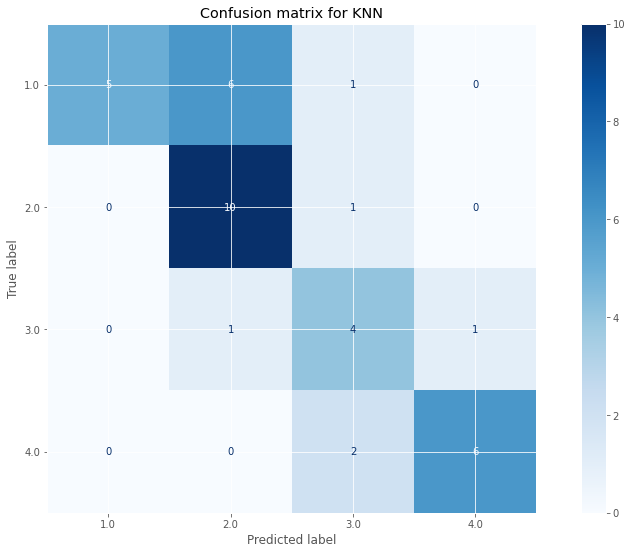

In [24]:
pred = knn.predict(X_test)
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(knn, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
plt.title('Confusion matrix for KNN')
plt.show(matrix)
plt.show()

([<matplotlib.axis.XTick at 0x157a2252790>,
 <a list of 5 Text major ticklabel objects>)

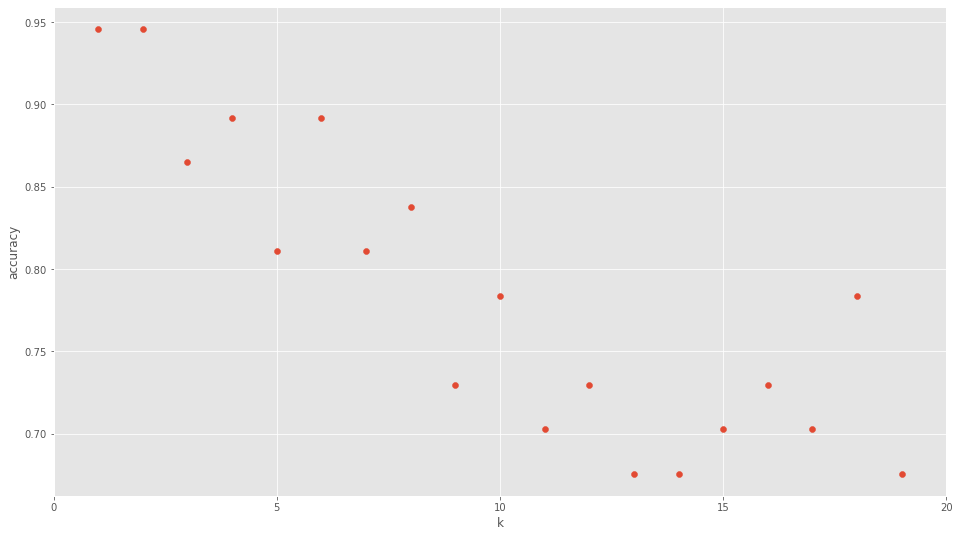

In [23]:
#obteniendo el mejor valor de K a partir del conjunto de validación con mejor,accuracy
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k,weights='distance',metric=distance, metric_params=None,algorithm='brute')
    #knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])